In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, pearsonr

# Загрузка данных из локального файла
data = pd.read_csv("banana_quality_dataset.csv")

# Просмотр первых строк для понимания структуры данных
data.head()

: 

# Анализ структуры данных

In [ ]:
# Общая информация о датасете
data.info()

: 

In [ ]:
# Проверка наличия пропущенных значений
data.isnull().sum()

,0
sample_id,0
variety,0
region,0
quality_score,0
quality_category,0
ripeness_index,0
ripeness_category,0
sugar_content_brix,0
firmness_kgf,0
length_cm,0


In [ ]:
# Статистическое описание числовых данных
data.describe()

,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.465160,4.042170,18.516830,2.706840,19.882100,164.738930,10.879600,723.556700,1972.992800,104.391300
std,288.819436,0.540909,1.753211,2.034812,1.289252,5.736318,49.163073,5.215554,427.372855,564.467912,53.607794
min,1.000000,0.920000,1.020000,15.000000,0.500000,10.000000,81.050000,2.000000,0.400000,1000.500000,10.000000
25%,250.750000,2.090000,2.447500,16.827500,1.590000,14.902500,122.397500,6.300000,353.950000,1498.750000,60.150000
50%,500.500000,2.440000,4.110000,18.500000,2.680000,19.890000,163.365000,10.700000,726.000000,1957.400000,104.100000
75%,750.250000,2.850000,5.562500,20.312500,3.820000,24.800000,205.775000,15.600000,1071.725000,2431.800000,149.850000
max,1000.000000,3.890000,7.000000,21.980000,5.000000,29.950000,249.890000,20.000000,1498.400000,2992.000000,199.900000


# Подготовка данных

In [ ]:
# Проверим уникальные значения в категориальных столбцах (если есть)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

variety: ['Manzano' 'Plantain' 'Burro' 'Red Dacca' 'Fehi' 'Lady Finger' 'Blue Java'
 'Cavendish']
region: ['Colombia' 'Guatemala' 'Ecuador' 'Costa Rica' 'Brazil' 'Honduras' 'India'
 'Philippines']
quality_category: ['Processing' 'Premium' 'Good' 'Unripe']
ripeness_category: ['Turning' 'Ripe' 'Overripe' 'Green']
harvest_date: ['2023-10-16' '2023-10-14' '2023-09-08' '2023-10-07' '2023-10-02'
 '2023-10-06' '2023-09-04' '2023-10-27' '2023-10-05' '2023-09-02'
 '2023-09-01' '2023-10-10' '2023-09-29' '2023-09-20' '2023-09-10'
 '2023-09-28' '2023-09-23' '2023-09-16' '2023-09-17' '2023-10-24'
 '2023-09-03' '2023-09-11' '2023-10-13' '2023-09-27' '2023-09-21'
 '2023-09-26' '2023-10-30' '2023-10-08' '2023-10-23' '2023-09-07'
 '2023-10-19' '2023-09-05' '2023-09-19' '2023-10-03' '2023-09-30'
 '2023-09-25' '2023-10-21' '2023-09-15' '2023-09-24' '2023-10-01'
 '2023-10-25' '2023-10-09' '2023-09-09' '2023-10-22' '2023-09-18'
 '2023-09-22' '2023-10-28' '2023-10-18' '2023-10-15' '2023-09-14'
 '2023-10-26'

In [ ]:
# Уберем строки с пропущенными значениями
data = data.dropna()

In [ ]:
# Если есть категориальные данные, преобразуем их в числовой формат (например, One-Hot Encoding)
if not categorical_columns.empty:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Проверим финальную структуру после подготовки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_id                    1000 non-null   int64  
 1   quality_score                1000 non-null   float64
 2   ripeness_index               1000 non-null   float64
 3   sugar_content_brix           1000 non-null   float64
 4   firmness_kgf                 1000 non-null   float64
 5   length_cm                    1000 non-null   float64
 6   weight_g                     1000 non-null   float64
 7   tree_age_years               1000 non-null   float64
 8   altitude_m                   1000 non-null   float64
 9   rainfall_mm                  1000 non-null   float64
 10  soil_nitrogen_ppm            1000 non-null   float64
 11  variety_Burro                1000 non-null   bool   
 12  variety_Cavendish            1000 non-null   bool   
 13  variety_Fehi       

# Визуализация данных

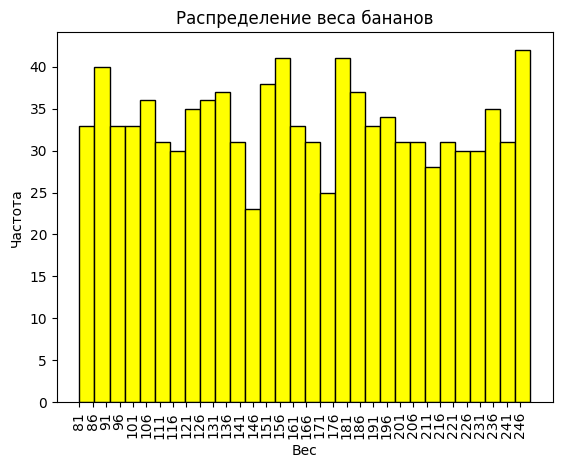

In [8]:
# Построение гистограммы для одного из числовых столбцов (например, веса бананов)
plt.hist(data['weight_g'], bins=30, color='yellow', edgecolor='black')
plt.title("Распределение веса бананов")
plt.xlabel("Вес")
plt.ylabel("Частота")

x_ticks = np.arange(data['weight_g'].min(), data['weight_g'].max() + 1, step=5)  # Задаем шаг, например, 50
plt.xticks(x_ticks, rotation=90)  # Опционально поворачиваем подписи оси X для лучшей читаемости

plt.show()

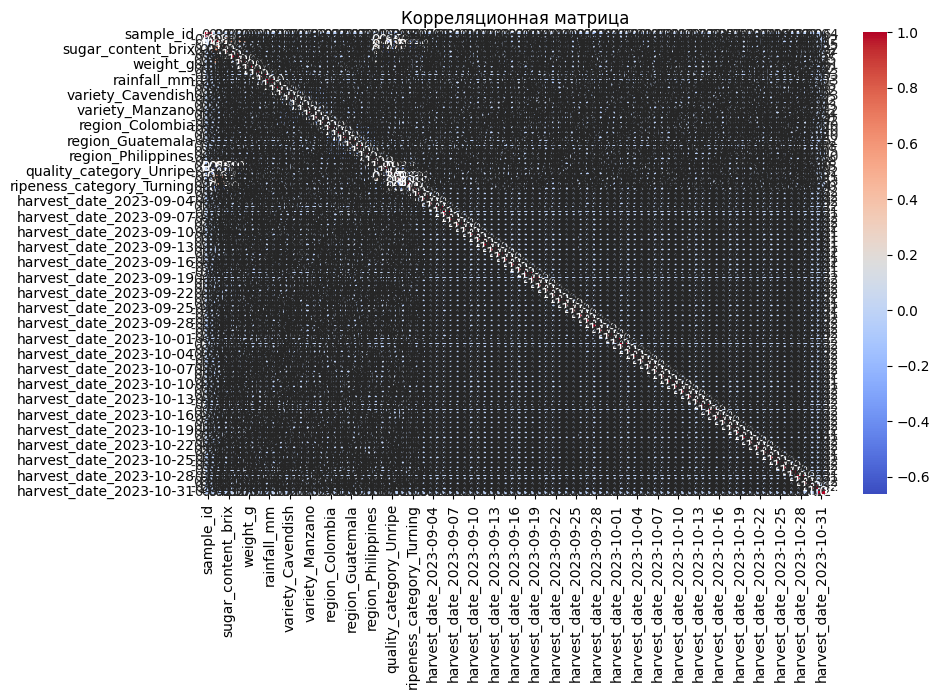

In [ ]:
# Корреляционная матрица для всех числовых признаков
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

# **Проверка статистической гипотезы**

Гипотеза: Вес бананов распределен нормально.
Для проверки нормальности используем тест D'Агостино.

In [ ]:
stat, p_value = normaltest(data['weight_g'])
print(f"Статистика: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Нулевая гипотеза отвергается: данные не распределены нормально.")
else:
    print("Нулевая гипотеза не отвергается: данные распределены нормально.")


Статистика: 653.8417576244608, p-value: 1.0472884474305276e-142
Нулевая гипотеза отвергается: данные не распределены нормально.


Проверка корреляции между весом и другими числовыми переменными

In [ ]:
# Корреляция между весом и длиной банана
corr, p_value_corr = pearsonr(data['weight_g'], data['length_cm'])
print(f"Коэффициент корреляции: {corr}, p-value: {p_value_corr}")

if p_value_corr < 0.05:
    print("Существует статистически значимая корреляция между весом и длиной.")
else:
    print("Корреляция между весом и длиной статистически незначима.")


Коэффициент корреляции: -0.05587956082640178, p-value: 0.07735611000548158
Корреляция между весом и длиной статистически незначима.
